# Importing all required Libraries

In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value

# Load the dataset

In [63]:
machine1_df = pd.read_csv('machine1.csv')
machine2_df = pd.read_csv('machine2.csv')

In [64]:
machine1_df.head()

,input_1,input_2,input_3,power,check
0,21.61,5.92,167.45,69.83,100
1,16.85,10.98,438.88,69.10,100
2,23.85,4.68,343.17,72.11,100
3,23.03,7.43,539.39,76.19,100
4,23.29,8.35,383.42,71.67,100


In [65]:
machine2_df.head()

,input_1,input_2,input_3,power,check
0,29,11,200,78.166434,100
1,29,11,400,88.237874,95
2,29,11,600,107.797314,91
3,29,11,800,136.844754,109
4,29,11,1000,175.380194,105


In [66]:
print("machine1 shape :",machine1_df.shape)
print("machine2 shape :",machine2_df.shape)


machine1 shape : (384, 5)
machine2 shape : (46, 5)


# EDA

### machine1

<Axes: xlabel='None', ylabel='input_3'>

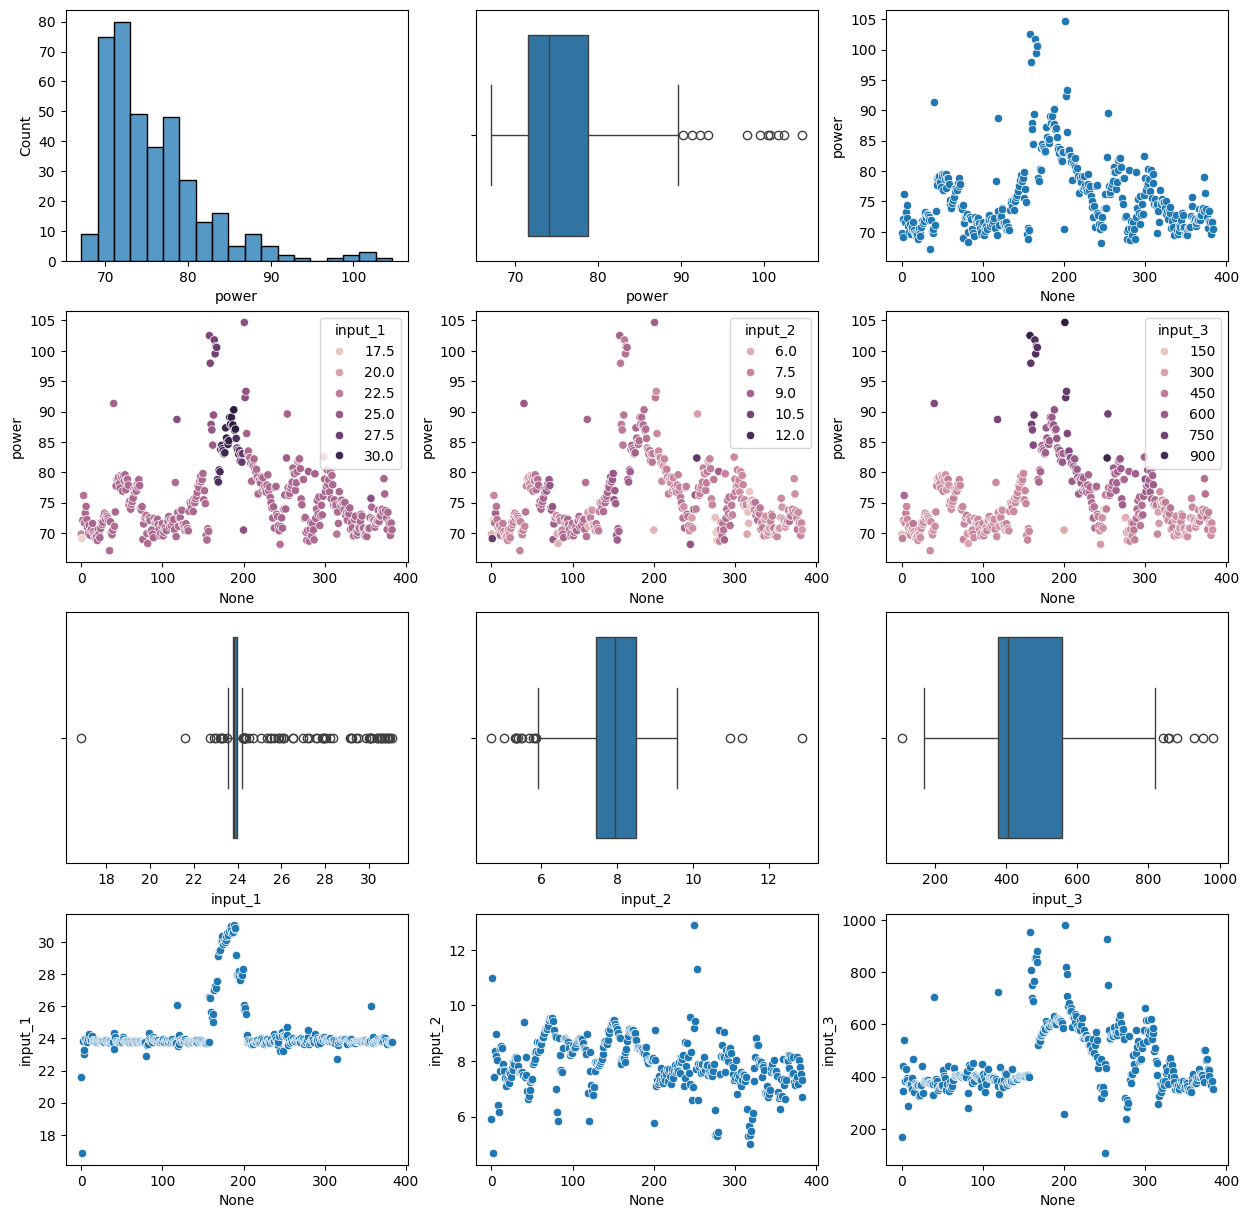

In [67]:
fig, ax=plt.subplots(4,3, figsize=(15,15))
sns.histplot(machine1_df, x='power', ax=ax[0,0])
sns.boxplot(machine1_df, x='power',ax=ax[0,1])
sns.scatterplot(machine1_df, x=machine1_df.index,y='power',ax=ax[0,2])
sns.scatterplot(machine1_df, x=machine1_df.index,y='power',hue='input_1',ax=ax[1,0])
sns.scatterplot(machine1_df, x=machine1_df.index,y='power',hue='input_2',ax=ax[1,1])
sns.scatterplot(machine1_df, x=machine1_df.index,y='power',hue='input_3',ax=ax[1,2])


sns.boxplot(machine1_df, x='input_1',ax=ax[2,0])
sns.boxplot(machine1_df, x='input_2',ax=ax[2,1])
sns.boxplot(machine1_df, x='input_3',ax=ax[2,2])

sns.scatterplot(machine1_df, x=machine1_df.index,y='input_1',ax=ax[3,0])
sns.scatterplot(machine1_df, x=machine1_df.index,y='input_2',ax=ax[3,1])
sns.scatterplot(machine1_df, x=machine1_df.index,y='input_3',ax=ax[3,2])


<Axes: >

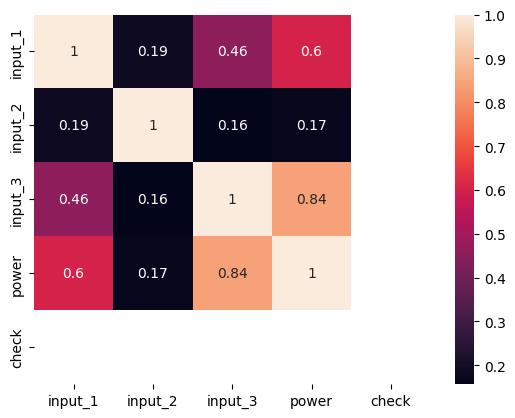

In [68]:
machine1_corr_mat= machine1_df.corr()
sns.heatmap(machine1_corr_mat, annot=True)

<Axes: xlabel='None', ylabel='check'>

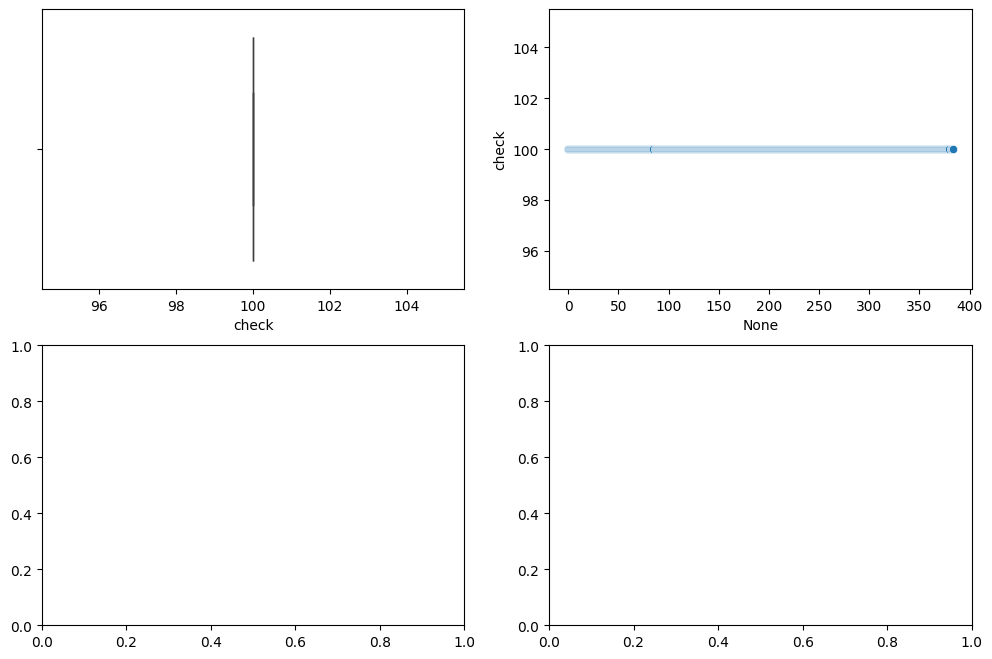

In [69]:
fig, ax= plt.subplots(2,2, figsize=(12,8))
sns.boxplot(machine1_df, x='check',ax=ax[0,0])
sns.scatterplot(machine1_df, x=machine1_df.index, y='check', ax=ax[0,1])

### machine2

<Axes: xlabel='None', ylabel='input_3'>

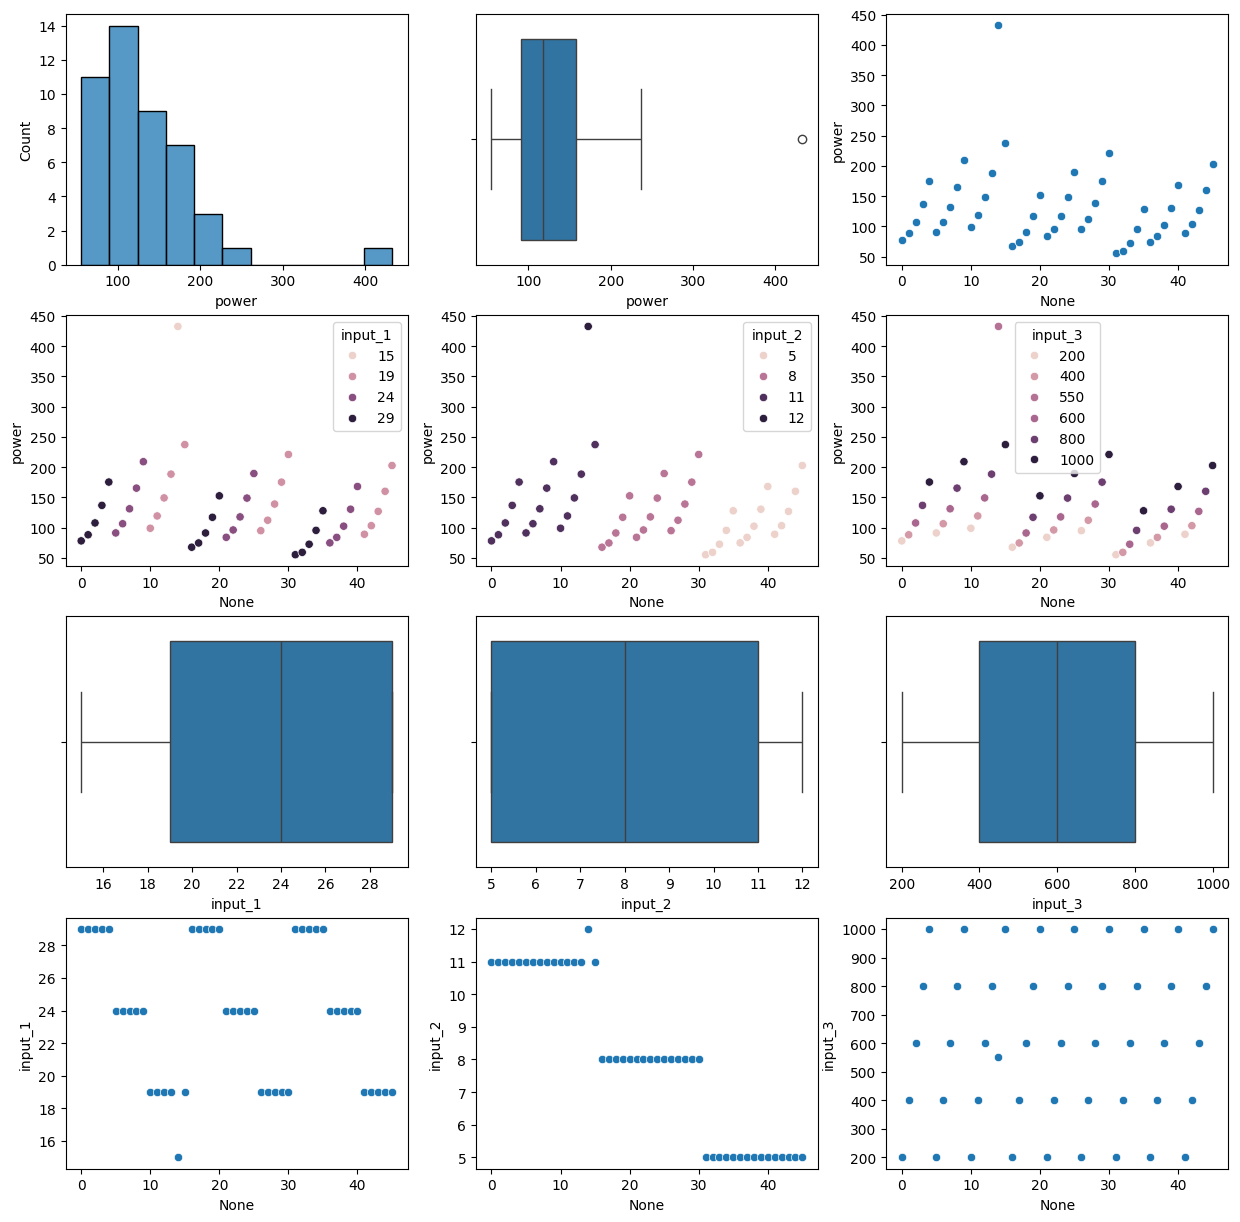

In [70]:
fig, ax=plt.subplots(4,3, figsize=(15,15))
sns.histplot(machine2_df, x='power', ax=ax[0,0])
sns.boxplot(machine2_df, x='power',ax=ax[0,1])
sns.scatterplot(machine2_df, x=machine2_df.index,y='power',ax=ax[0,2])
sns.scatterplot(machine2_df, x=machine2_df.index,y='power',hue='input_1',ax=ax[1,0])
sns.scatterplot(machine2_df, x=machine2_df.index,y='power',hue='input_2',ax=ax[1,1])
sns.scatterplot(machine2_df, x=machine2_df.index,y='power',hue='input_3',ax=ax[1,2])


sns.boxplot(machine2_df, x='input_1',ax=ax[2,0])
sns.boxplot(machine2_df, x='input_2',ax=ax[2,1])
sns.boxplot(machine2_df, x='input_3',ax=ax[2,2])

sns.scatterplot(machine2_df, x=machine2_df.index,y='input_1',ax=ax[3,0])
sns.scatterplot(machine2_df, x=machine2_df.index,y='input_2',ax=ax[3,1])
sns.scatterplot(machine2_df, x=machine2_df.index,y='input_3',ax=ax[3,2])



<Axes: >

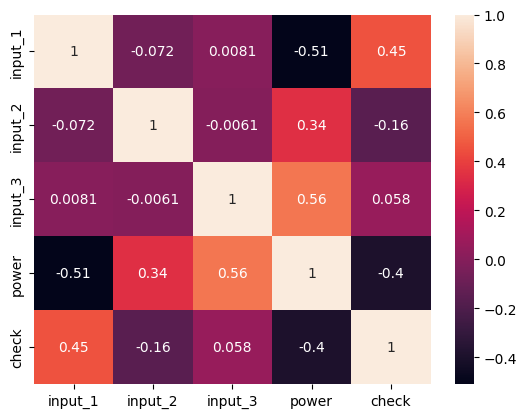

In [71]:
machine2_corr_mat= machine2_df.corr()
sns.heatmap(machine2_corr_mat, annot=True)

<Axes: xlabel='None', ylabel='check'>

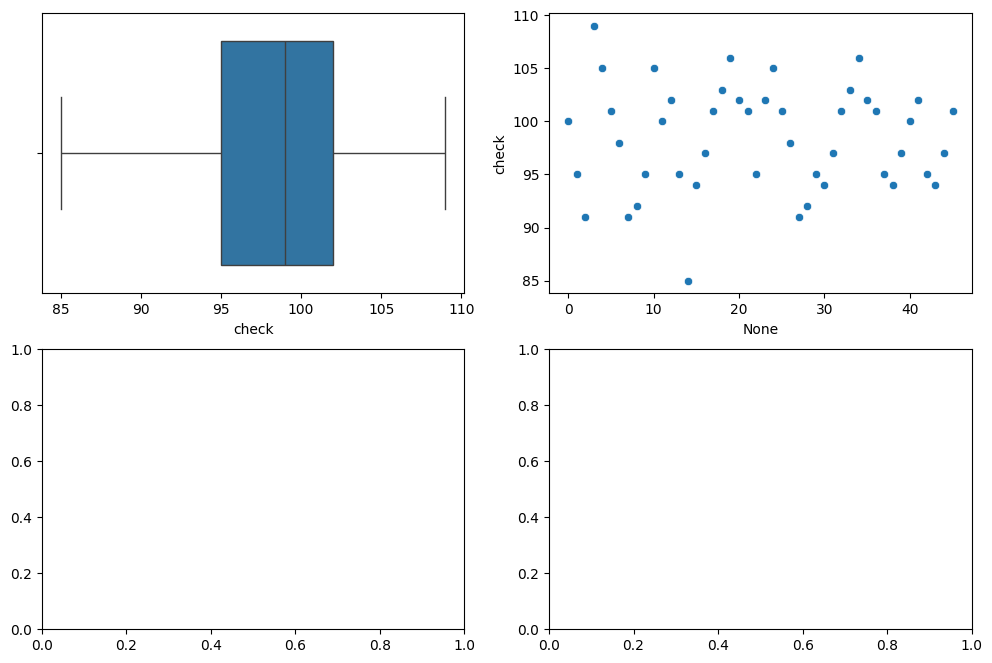

In [72]:
fig, ax= plt.subplots(2,2, figsize=(12,8))
sns.boxplot(machine2_df, x='check',ax=ax[0,0])
sns.scatterplot(machine2_df, x=machine2_df.index, y='check', ax=ax[0,1])

# data preprocessing

In [73]:
# Step 1: Learning (Model power usage)
# Filter valid rows based on 'check' column (between 90 and 110)
machine1_df = machine1_df[(machine1_df['check'] >= 90) & (machine1_df['check'] <= 110)]
machine2_df = machine2_df[(machine2_df['check'] >= 90) & (machine2_df['check'] <= 110)]

In [74]:
machine1_df.shape

(384, 5)

In [75]:
machine2_df.shape

(45, 5)

# Model Experiment

#### (1) Linear Regression

In [76]:

# Separate features and target for both machines
X1 = machine1_df[['input_1', 'input_2', 'input_3']]
y1 = machine1_df['power']

X2 = machine2_df[['input_1', 'input_2', 'input_3']]
y2 = machine2_df['power']

# Train Linear Regression models
model1 = LinearRegression().fit(X1, y1)
model2 = LinearRegression().fit(X2, y2)


In [77]:
# Predict power and calculate error
y1_pred = model1.predict(X1)
y2_pred = model2.predict(X2)

mse1 = mean_squared_error(y1, y1_pred)
mse2 = mean_squared_error(y2, y2_pred)


r2_1 = r2_score(y1, y1_pred)
r2_2 = r2_score(y2, y2_pred)

print(f"Machine 1 MSE: {mse1}")
print(f"Machine 2 MSE: {mse2}")

print(f"Machine 1 r2-squre: {r2_1}")
print(f"Machine 2 r2-squre: {r2_2}")


Machine 1 MSE: 8.792467686001777
Machine 2 MSE: 117.13472451686371
Machine 1 r2-squre: 0.7649009539183689
Machine 2 r2-squre: 0.9421477860587306


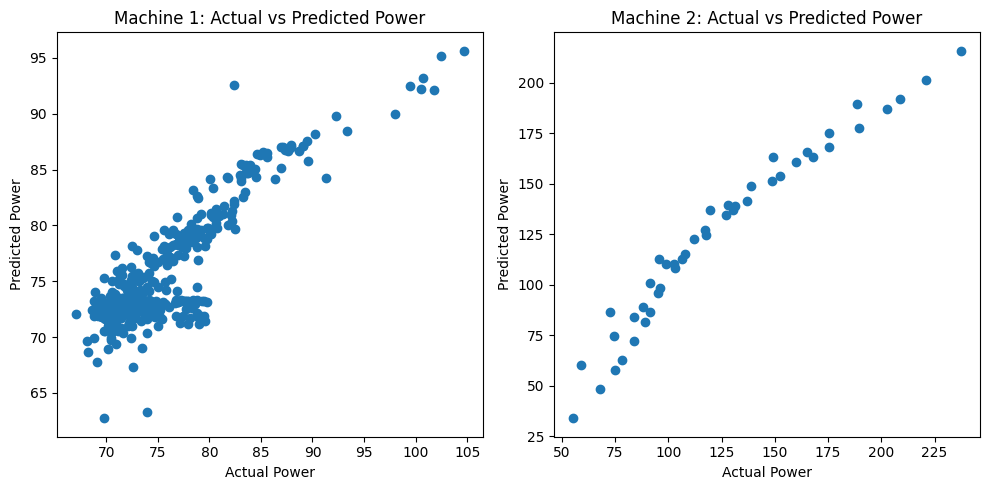

In [78]:
# Plot actual vs predicted power
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y1, y1_pred)
plt.title('Machine 1: Actual vs Predicted Power')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')

plt.subplot(1, 2, 2)
plt.scatter(y2, y2_pred)
plt.title('Machine 2: Actual vs Predicted Power')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')

plt.tight_layout()
plt.show()


## (A): Optimization using PuLP + Machine Learning 


In [79]:
# Step 2: Optimization using PuLP

# Define power prediction functions using the trained models
def power_machine1(gph):
    return model1.predict([[25, 6, gph]])[0]

def power_machine2(gph):
    return model2.predict([[25, 6, gph]])[0]

# Create the PuLP optimization problem
problem = LpProblem("Minimize_Total_Power", LpMinimize)

# Create decision variables for GPH of each machine
gph_vars = [LpVariable(f"gph_machine1_{i+1}", lowBound=180, upBound=600) for i in range(10)] + \
           [LpVariable(f"gph_machine2_{i+1}", lowBound=300, upBound=1000) for i in range(10)]

# Objective function: minimize total power consumption
total_power = lpSum([power_machine1(gph_vars[i]) for i in range(10)]) + \
              lpSum([power_machine2(gph_vars[i]) for i in range(10, 20)])
problem += total_power, "Total Power"

# Constraint: total GPH should equal 9000
problem += lpSum(gph_vars) == 9000, "Total GPH Constraint"

# Solve the optimization problem
problem.solve()

# Output the results
print(f"Status: {LpStatus[problem.status]}")
optimal_gph = [value(var) for var in gph_vars]
total_optimal_power = value(total_power)

print("Optimal GPH values for each machine:")
for i in range(20):
    if i < 10:
        print(f"Machine 1 - {i+1}: {optimal_gph[i]}")
    else:
        print(f"Machine 2 - {i-9}: {optimal_gph[i]}")

print(f"Total Optimal Power Consumption: {total_optimal_power}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/zeeshan/miniconda3/envs/LangChain/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hr/rf0dchj10b12tqdvgfmnxw_h0000gp/T/16d384134e8e4ea1997e0708f6c6de5f-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/hr/rf0dchj10b12tqdvgfmnxw_h0000gp/T/16d384134e8e4ea1997e0708f6c6de5f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 47 RHS
At line 49 BOUNDS
At line 90 ENDATA
Problem MODEL has 1 rows, 20 columns and 20 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (0) rows, 20 (0) columns and 20 (0) elements
Perturbing problem by 0.001% of 0.1317706 - largest nonzero change 1.0262198e-07 ( 0.00027571941%) - largest zero change 0
0  Obj 458.4114 Primal inf 4200 (1)
10  Obj 605.64325
Optimal - objective value 605.64245
Optimal objective 605.6424528 -

/Users/zeeshan/miniconda3/envs/LangChain/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/zeeshan/miniconda3/envs/LangChain/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/zeeshan/miniconda3/envs/LangChain/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/zeeshan/miniconda3/envs/LangChain/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/zeeshan/miniconda3/envs/LangChain/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression wa

## (B): Optimization using PuLP + Self defined function


# 1st-Method: Linear Programming Problem

In [80]:
# Define assumed power usage functions (simple quadratic models)
def power_machine1(gph):
    # Example of a quadratic function (this is just an assumption)
    return  1.2 * gph + 100

def power_machine2(gph):
    # Another quadratic function for machine type 2
    return  1.1 * gph + 150

# Create the PuLP optimization problem
problem = LpProblem("Minimize_Total_Power", LpMinimize)

# Create decision variables for GPH of each machine
gph_vars = [LpVariable(f"gph_machine1_{i+1}", lowBound=180, upBound=600) for i in range(10)] + \
        [LpVariable(f"gph_machine2_{i+1}", lowBound=300, upBound=1000) for i in range(10)]

# Objective function: minimize total power consumption
total_power = lpSum([power_machine1(gph_vars[i]) for i in range(10)]) + \
            lpSum([power_machine2(gph_vars[i]) for i in range(10, 20)])
problem += total_power, "Total Power"

# Constraint: total GPH should equal 9000
problem += lpSum(gph_vars) == 9000, "Total GPH Constraint"

# Solve the optimization problem
problem.solve()

# Output the results
print(f"Status: {LpStatus[problem.status]}")
optimal_gph = [value(var) for var in gph_vars]
total_optimal_power = value(total_power)

print("Optimal GPH values for each machine:")
for i in range(20):
    if i < 10:
        print(f"Machine 1 - {i+1}: {optimal_gph[i]}")
    else:
        print(f"Machine 2 - {i-9}: {optimal_gph[i]}")

print(f"Total Optimal Power Consumption: {total_optimal_power}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/zeeshan/miniconda3/envs/LangChain/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hr/rf0dchj10b12tqdvgfmnxw_h0000gp/T/e3247c880ef64ede9515708153035b43-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/hr/rf0dchj10b12tqdvgfmnxw_h0000gp/T/e3247c880ef64ede9515708153035b43-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 47 RHS
At line 49 BOUNDS
At line 90 ENDATA
Problem MODEL has 1 rows, 20 columns and 20 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (0) rows, 20 (0) columns and 20 (0) elements
Perturbing problem by 0.001% of 1.2 - largest nonzero change 2.139189e-07 ( 1.8089021e-05%) - largest zero change 0
0  Obj 5460.0008 Primal inf 4200 (1)
6  Obj 10080.002
Optimal - objective value 10080
Optimal objective 10080 - 6 iterations tim

## 2nd-Method: Non Linear Programming Problem

In [81]:

# Define assumed power usage functions (simple quadratic models)
def power_machine1(gph):
    # Example of a quadratic function (this is just an assumption)
    return 0.005 * gph**2 + 1.2 * gph + 100

def power_machine2(gph):
    # Another quadratic function for machine type 2
    return 0.004 * gph**2 + 1.1 * gph + 150

# Create the PuLP optimization problem
problem = LpProblem("Minimize_Total_Power", LpMinimize)

# Create decision variables for GPH of each machine
gph_vars = [LpVariable(f"gph_machine1_{i+1}", lowBound=180, upBound=600) for i in range(10)] + \
        [LpVariable(f"gph_machine2_{i+1}", lowBound=300, upBound=1000) for i in range(10)]

# Objective function: minimize total power consumption
total_power = lpSum([power_machine1(gph_vars[i]) for i in range(10)]) + \
            lpSum([power_machine2(gph_vars[i]) for i in range(10, 20)])
problem += total_power, "Total Power"

# Constraint: total GPH should equal 9000
problem += lpSum(gph_vars) == 9000, "Total GPH Constraint"

# Solve the optimization problem
problem.solve()

# Output the results
print(f"Status: {LpStatus[problem.status]}")
optimal_gph = [value(var) for var in gph_vars]
total_optimal_power = value(total_power)

print("Optimal GPH values for each machine:")
for i in range(20):
    if i < 10:
        print(f"Machine 1 - {i+1}: {optimal_gph[i]}")
    else:
        print(f"Machine 2 - {i-9}: {optimal_gph[i]}")

print(f"Total Optimal Power Consumption: {total_optimal_power}")


TypeError: unsupported operand type(s) for ** or pow(): 'LpVariable' and 'int'

## Optimization using Gurobi

In [82]:
from gurobipy import Model, GRB

# Create a model
m = Model()

# Define variables with bounds
gph_vars = m.addVars(20, lb=[180]*10 + [300]*10, ub=[600]*10 + [1000]*10, name="gph")

# Define objective function (quadratic)
m.setObjective(
    sum(0.005 * gph_vars[i]**2 + 1.2 * gph_vars[i] + 100 for i in range(10)) +
    sum(0.004 * gph_vars[i]**2 + 1.1 * gph_vars[i] + 150 for i in range(10, 20)),
    GRB.MINIMIZE
)

# Add constraint: total GPH must be 9000
m.addConstr(sum(gph_vars[i] for i in range(20)) == 9000)

# Solve the model
m.optimize()

# Output results
optimal_gph = [gph_vars[i].x for i in range(20)]
total_optimal_power = m.objVal

print("Optimal GPH values:", optimal_gph)
print("Total Power Consumption:", total_optimal_power)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G93)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0x0a7b423d
Model has 20 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [8e-03, 1e-02]
  Bounds range     [2e+02, 1e+03]
  RHS range        [9e+03, 9e+03]
Presolve time: 0.01s
Presolved: 1 rows, 20 columns, 20 nonzeros
Presolved model has 20 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6.60249600e+06 -7.41280600e+06  2.00e+04 6.40e+02  1.03e+06     0s
   1   3.12456787e+